## 1. Loading the requried libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

## 2. Loading the data

In [7]:
df=pd.read_csv("Ds_Data.csv")

In [8]:
df.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 3. Data Preprocessing

In [10]:
df.shape

(12684, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [12]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### a) Handling duplicate values

In [15]:
df.duplicated().sum()

291

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

#### b) Handling Missing Values

In [19]:
(df.isnull().sum())/(len(df))*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.144678
Bar                      0.855322
CoffeeHouse              1.734850
CarryAway                1.194223
RestaurantLessThan20     1.032841
Restaurant20To50         1.516985
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [20]:
df["car"].value_counts()

car
Mazda5                                      22
do not drive                                22
Scooter and motorcycle                      21
crossover                                   21
Car that is too old to install Onstar :D    20
Name: count, dtype: int64

##### Drop this column before modelling step because this column is having more than 99% missing values. 

In [22]:
df["Bar"].value_counts()

Bar
never    5089
less1    3383
1~3      2432
4~8      1045
gt8       338
Name: count, dtype: int64

In [23]:
#Filling the missing values with mode
df["Bar"].fillna((df["Bar"]).mode()[0],inplace=True)

In [24]:
df["Bar"].isnull().sum()

0

In [25]:
df["CoffeeHouse"].value_counts()

CoffeeHouse
less1    3310
1~3      3138
never    2895
4~8      1752
gt8      1083
Name: count, dtype: int64

In [26]:
df["CoffeeHouse"].fillna((df["CoffeeHouse"]).mode()[0],inplace=True)

In [27]:
df["Bar"].isnull().sum()

0

In [28]:
df["CarryAway"].isnull().sum()

148

In [29]:
df["CarryAway"].value_counts()

CarryAway
1~3      4571
4~8      4171
less1    1819
gt8      1535
never     149
Name: count, dtype: int64

In [30]:
df["CarryAway"].fillna((df["CarryAway"]).mode()[0],inplace=True)

In [31]:
df["CarryAway"].isnull().sum()

0

In [32]:
df["RestaurantLessThan20"].isnull().sum()

128

In [33]:
df["RestaurantLessThan20"].fillna((df["RestaurantLessThan20"]).mode()[0],inplace=True)

In [34]:
df["RestaurantLessThan20"].isnull().sum()

0

In [35]:
df["Restaurant20To50"].isnull().sum()

188

In [36]:
df["Restaurant20To50"].fillna((df["Restaurant20To50"]).mode()[0],inplace=True)

In [37]:
df["RestaurantLessThan20"].isnull().sum()

0

In [38]:
df.drop("car",inplace=True,axis=1)

In [39]:
(df.isnull().sum())/(len(df))*100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Accept(Y/N?)            0.0
dtype: float64

#### c) Handling outliers

In [41]:
df.columns.values

array(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'], dtype=object)

In [42]:
num_continuous_col=[]
for col in df.columns:
    if (df[col].dtype=="int64" or df[col].dtype=="float64") and df[col].nunique()>8:
       num_continuous_col.append(col)
print(num_continuous_col)


[]


##### *There are no continuous numerical column,so we handle only categorical column.

In [44]:
df["toCoupon_GEQ5min"].value_counts()

toCoupon_GEQ5min
1    12393
Name: count, dtype: int64

##### This column has only 1 value,which means it doesn't provide and information.Therefore,we have to drop this column

In [46]:
df.drop("toCoupon_GEQ5min",inplace=True,axis=1)

In [47]:
for i in df.columns:
    if df[i].dtype=='object':
        print("******************")
        print(df[i].value_counts())
        

******************
destination
No Urgent Place    6118
Home               3161
Work               3114
Name: count, dtype: int64
******************
passanger
Alone        7178
Friend(s)    3166
Partner      1068
Kid(s)        981
Name: count, dtype: int64
******************
weather
Sunny    9862
Snowy    1329
Rainy    1202
Name: count, dtype: int64
******************
coupon
Coffee House             3913
Restaurant(<20)          2708
Carry out & Take away    2275
Bar                      2010
Restaurant(20-50)        1487
Name: count, dtype: int64
******************
expiration
1d    6938
2h    5455
Name: count, dtype: int64
******************
gender
Female    6355
Male      6038
Name: count, dtype: int64
******************
age
21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: count, dtype: int64
******************
maritalStatus
Married partner      4994
Single               4610
Unmarried partner    2155

## 4. Exploratory Data Analysis

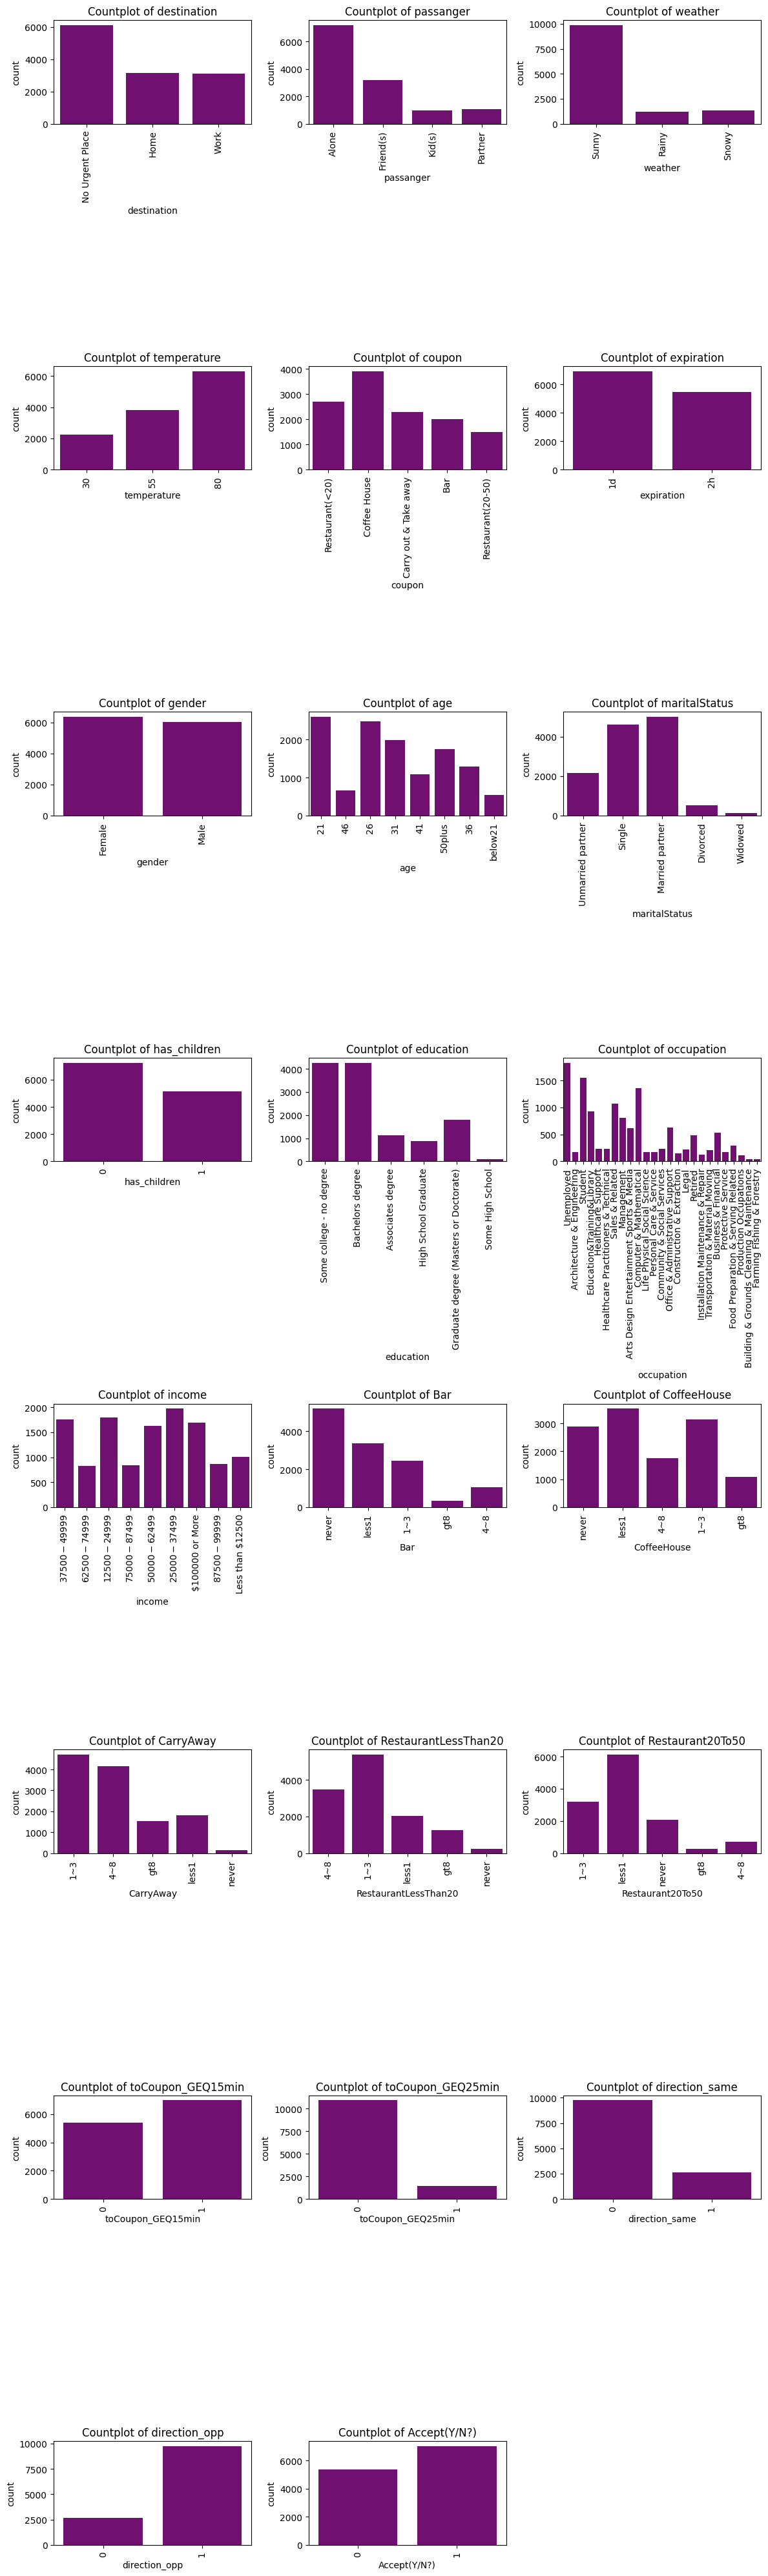

<Figure size 640x480 with 0 Axes>

In [49]:

n_cols = 3  
all_cols = df.columns.tolist()  
n_rows = int(np.ceil(len(all_cols) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(all_cols):
    ax = axes[i]  
    
    sns.countplot(x=df[col], color="purple", ax=ax) 
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(all_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
plt.savefig("plot.pdf", bbox_inches='tight')


<Axes: xlabel='Accept(Y/N?)', ylabel='count'>

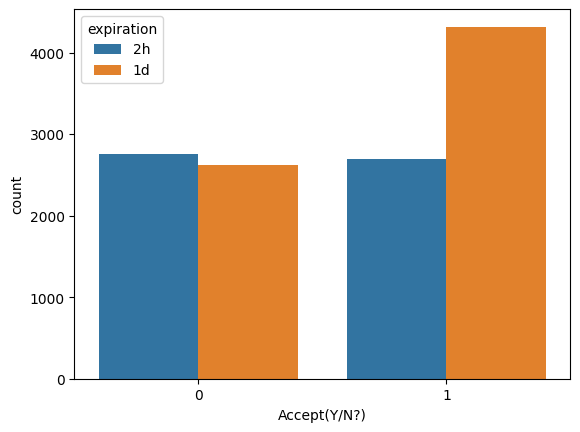

In [50]:
sns.countplot(x=df["Accept(Y/N?)"],hue=df["expiration"])

<Axes: xlabel='Accept(Y/N?)', ylabel='count'>

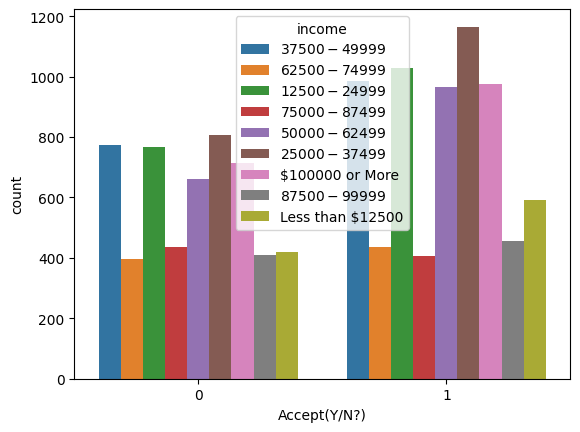

In [51]:
sns.countplot(x=df["Accept(Y/N?)"],hue=df["income"])

#### People having income in the range of 25000-37499 are acceptiing as well as not accepting the coupon. 

<Axes: >

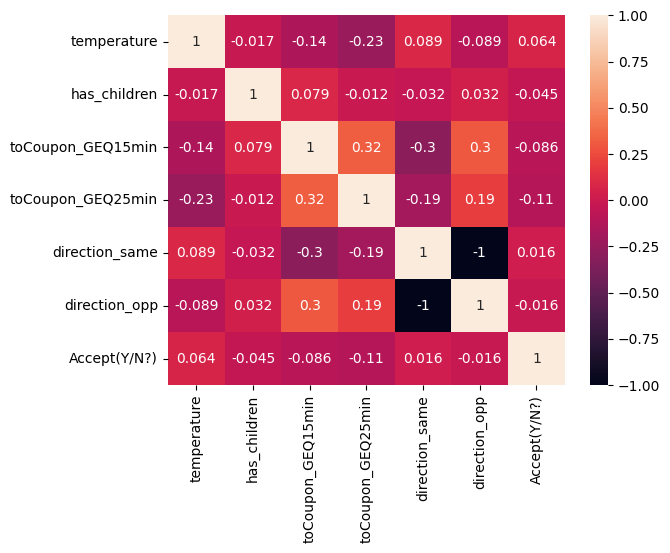

In [53]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

##### Columns direction_opp and direction_same are perfectly correlated (-1), so we can retain only one.

In [55]:
df=df.drop("direction_opp",axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null  obj

## 5. Column Transformation


In [58]:
#Doing one hot encoding of categorical column

df_encoded = pd.get_dummies(df.select_dtypes(exclude='int64'), drop_first=True)
df_encoded=df_encoded*1
df_encoded

,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12680,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12681,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12682,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
#Doing label encoding of temperature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["temperature"]=le.fit_transform(df["temperature"])
df_final=pd.concat([df_encoded,df.select_dtypes(exclude='object')],axis=1)
df_final

,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?)
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,2,1,0,0,0,0
2,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,2,1,1,0,0,1
3,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,2,1,1,0,0,0
4,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
12680,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12681,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12682,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## 6. Model Building

In [61]:
df_final.columns = df_final.columns.str.replace(r'[^\w\s]', '_', regex=True)

In [62]:
x=df_final.iloc[:,:-1]
y=df_final["Accept_Y_N__"]

In [63]:
x

,destination_No Urgent Place,destination_Work,passanger_Friend_s_,passanger_Kid_s_,passanger_Partner,weather_Snowy,weather_Sunny,coupon_Carry out _ Take away,coupon_Coffee House,coupon_Restaurant_20_50_,...,RestaurantLessThan20_never,Restaurant20To50_4_8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,2,1,0,0,0
2,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,2,1,1,0,0
3,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,2,1,1,0,0
4,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
12680,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12681,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12682,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [64]:
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Accept_Y_N__, Length: 12393, dtype: int64

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
models={
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Random Forest Classfier':RandomForestClassifier(),
    'K Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
   }

In [67]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Training Accuracy: ", train_accuracy)
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)
    print("Confusion Matrix:\n ",confusion_mat)
    

    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)
    print('\n')

max_accuracy_index = accuracy_list.index(max(accuracy_list))
print(f"The best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy:  0.6883195481137785
Testing Accuracy:  0.6865671641791045
Precision:  0.6927083333333334
Recall:  0.7772096420745069
F1 Score:  0.7325301204819277
Confusion Matrix:
  [[ 638  472]
 [ 305 1064]]


Model: Naive Bayes
Training Accuracy:  0.6211418196489812
Testing Accuracy:  0.627672448567971
Precision:  0.6877104377104377
Recall:  0.5967859751643535
F1 Score:  0.6390301134141572
Confusion Matrix:
  [[739 371]
 [552 817]]


Model: Random Forest Classfier
Training Accuracy:  0.9925358079483558
Testing Accuracy:  0.7361839451391691
Precision:  0.7375415282392026
Recall:  0.8108108108108109
F1 Score:  0.7724425887265136
Confusion Matrix:
  [[ 715  395]
 [ 259 1110]]


Model: K Nearest Neighbors
Training Accuracy:  0.7983659471454508
Testing Accuracy:  0.6716417910447762
Precision:  0.690984170681349
Recall:  0.733382030679328
F1 Score:  0.7115520907158044
Confusion Matrix:
  [[ 661  449]
 [ 365 1004]]


Model: Decision Tree
Training Accuracy:  0.

### Hyperparameter Tuning

In [69]:
#Finding best parametes for random forest model using GridSearchCV
model=RandomForestClassifier(random_state=42)
params={"n_estimators":[100,150,200,300,400,500],
        "criterion":["gini", "entropy", "log_loss"],
        "max_depth":[2,3,4,5]
       }
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid=params,cv=10,n_jobs=-1)
        

In [70]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 300, 400, 500]})

In [71]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}

In [72]:
#Finding best parametes for KNN model using GridSearchCV
model=KNeighborsClassifier()
params={"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13]}
grid=GridSearchCV(model,param_grid=params,cv=10,n_jobs=-1)

In [73]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13]})

In [74]:
grid.best_params_

{'n_neighbors': 11}

In [75]:
#Finding best parametes for Decision Tree model using GridSearchCV
model=DecisionTreeClassifier(random_state=42)
params={"criterion":["gini", "entropy","log_loss"],
        "splitter":["best","random"],
        "max_depth":[2,3,4,5,6]}
grid=GridSearchCV(model,param_grid=params,cv=10,n_jobs=-1)    

In [76]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [77]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'}

In [78]:
models={
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Random Forest Classfier':RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=5,random_state=42,n_jobs=-1),
    'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Decision Tree':DecisionTreeClassifier(criterion ='gini',random_state=42,max_depth = 6),
   }

In [79]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Training Accuracy: ", train_accuracy)
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)
    print("Confusion Matrix:\n ",confusion_mat)
    

    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)
    print('\n')

max_accuracy_index = accuracy_list.index(max(accuracy_list))
print(f"The best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy:  0.6883195481137785
Testing Accuracy:  0.6865671641791045
Precision:  0.6927083333333334
Recall:  0.7772096420745069
F1 Score:  0.7325301204819277
Confusion Matrix:
  [[ 638  472]
 [ 305 1064]]


Model: Naive Bayes
Training Accuracy:  0.6211418196489812
Testing Accuracy:  0.627672448567971
Precision:  0.6877104377104377
Recall:  0.5967859751643535
F1 Score:  0.6390301134141572
Confusion Matrix:
  [[739 371]
 [552 817]]


Model: Random Forest Classfier
Training Accuracy:  0.680451886221505
Testing Accuracy:  0.6639774102460669
Precision:  0.6377183967112025
Recall:  0.9065010956902849
F1 Score:  0.7487179487179487
Confusion Matrix:
  [[ 405  705]
 [ 128 1241]]


Model: K Nearest Neighbors
Training Accuracy:  0.7420819043776478
Testing Accuracy:  0.6518757563533683
Precision:  0.6640726329442282
Recall:  0.747991234477721
F1 Score:  0.7035383029886637
Confusion Matrix:
  [[ 592  518]
 [ 345 1024]]


Model: Decision Tree
Training Accuracy:  0.

Text(0, 0.5, 'Accuracy Score')

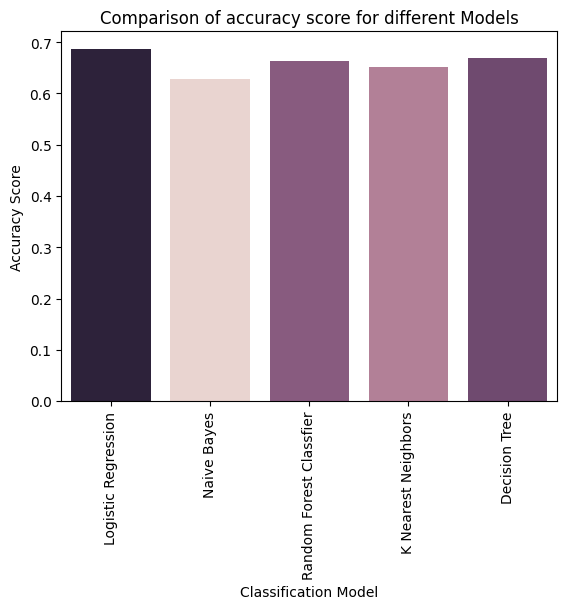

In [80]:
sns.barplot(x=model_list,y=accuracy_list, hue=accuracy_list,legend=False)
plt.xticks(rotation=90)
plt.title("Comparison of accuracy score for different Models")
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")

## The best model based on accuracy is Logistic Regression with Testing Accuracy: 0.6865671641791045